Data 
-----
https://www.opm.gov/data/
U.S. Office of Personnel Management
FedScope Separations Cube (2005 - 2015) 


Variables
----------

AGYSUB- The employing organization. The dataset has been limited to cabinet organizations (Executive Departments only)
     AF: Department of the Airforce
     AG: Department of Agriculture  
     AR: Department of the Army 
     CM: Department of Commerce
     DD: Department of Defense 
     DJ: Department of Justice 
     DL: Department of Labor 
     DN: Department of Energy 
     ED: Department of Education  
     HE: Department of Health and Human Services
     HS: Department of Homeland Security 
     HU: Department of Housing and Urban Development  
     IN: Department of the Interior 
     NV: Department of the Navy
     ST: Department of the State
     TD: Department of Transportation 
     TR: Department of the Treasury 
     VA: Department of Veterans Affairs 

SEP- Separations 
    Quits: Voluntary resignation by an employee, abandoning one's position, joining the military, or failing to return
    from military furlough. Quits also include separations by the agency if an employee declines a new position or
    relocation.

EFDATE- YYYMMM

AGELVL- Age, displayed in five year intervals except or an initial interval of less than 20 years and a final interval of 65 years or more 

GENDER- M/F

GSEGRD- The General Schedule grade for pay plans in the General Schedule and Equivalent pay plan category (See Pay Plan & Grade).

LOSLVL- Length of Service, The number of years of Federal civilian employment, creditable military service, and other service made creditable by specific legislation. Length of service is grouped by five-year intervals, except for:
    a. the initial intervals of less than 1 year, 1 2 years, and 3-4 years and
    b. thefinalintervalof35yearsormore.

LOC- Location 

PATCO- Occupation Category; Occupational categories are defined by the educational requirements of the occupation and the subject matter and level of difficulty or responsibility of the work.

PPGRD- Pay Plan & Grade; The pay system and, where applicable, the grade used to determine an employee's basic pay rate. Grade denotes a hierarchical position in a pay plan and is sometimes referred to as level, class, rank, or pay band.

SALLVL- Salary Level; An employee’s adjusted basic pay, which is an annualized rate of pay. Adjusted basic pay is the sum of an employee’s rate of basic pay plus any locality comparability payment and/or special pay adjustment for law enforcement officers. Salaries are grouped by $10,000 intervals, except for an initial interval of less than $20,000 and a final interval of $180,000 or more.

An employee's actual earnings may be more or less than the annualized rate because of factors such as overtime, shift differentials, less than full time work, or leave without pay.

TOA- Type of Appointment; An employee's appointment in terms of permanence and competitiveness.


WORKSCH- Work Schedule; The time basis on which an employee is scheduled to work.

SALARY- Average Salary; A measure representing the average adjusted basic pay, an annualized rate of pay. Adjusted basic pay is the sum of an employee’s rate of basic pay and any locality comparability payment and/or special pay adjustment for law enforcement officers.
An employee's actual earnings may be more or less than the annualized rate because of factors such as overtime, shift differentials, less than full time work, or leave without pay.

Invalid salary values are excluded from the average. A large number of invalid values could invalidate the average. To obtain counts of invalid values, display the data using the Salary Level dimension (See Salary Level).

LOS- Average Length of Service; A measure representing the average number of years of Federal civilian employment and creditable military service.

# Import Pacakges

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime 

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')



# Import Data

In [21]:
#Import Employment Data

emp05 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2005.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp06 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2006.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp07 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2007.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp08 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2008.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp09 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2009.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp10 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2010.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp11 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2011.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp12 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2012.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp13 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2013.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp14 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2014.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp15 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2015.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)

empframes = [emp05, emp06, emp07, emp08, emp09, emp10, emp11, emp12, emp13, emp14, emp15]
emp_df = pd.concat(empframes)


In [22]:
#Import Separation Data 
sep05 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2005.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep06 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2006.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep07 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2007.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep08 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2008.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep09 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2009.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep10 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2010.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep11 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2011.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep12 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2012.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep13 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2013.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep14 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2014.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep15 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2015.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sepframes = [sep05, sep06, sep07, sep08, sep09, sep10, sep11, sep12, sep13, sep14, sep15]
sep_df = pd.concat(sepframes)

In [151]:
emp_df = pd.concat(empframes)
sep_df = pd.concat(sepframes)

# Clean Data 

In [ ]:
def clean(df):
    #Drop Non Full-Time employees 
    Non_F = ['I', 'J', 'P', 'Q', 'R', 'S', 'T', 'G', 'H']
    df = df[~df.WORKSCH.isin(Non_F)] 

    #Drop Non Permanent employees
    Non_P = ['20', '40', '42', '44', '46', '48', '60', '65']
    df = df[~df.TOA.isin(Non_P)] 

    #Drop Foreign Countries 
    df['LOC'] = pd.to_numeric(df['LOC'], errors='coerce')

    #Keep cabinet level agencies only
    cabinet = 'AF', 'AG', 'AR', 'CM', 'DD', 'DJ', 'DL', 'DN', 'ED', 'HE', 'HS', 'HU', 'IN', 'NV', 'ST', 'TD', 'TR', 'VA'
    subset = df.AGYSUB.map(lambda x: x.startswith(cabinet))
    df.AGYSUB = [x[0:2] for x in df.AGYSUB]
    df = df[subset]

    return df

In [ ]:
sep_df = clean(sep_df)
emp_df = clean(emp_df)

In [ ]:
#Create Dependent Var 
Non_Quit = ['SA', 'SB', 'SD', 'SE', 'SF', 'SG', 'SH', 'SI', 'SJ', 'SK', 'SL']
sep_df = sep_df[~sep_df.SEP.isin(Non_Quit)] 
sep_df.SEP = sep_df.SEP.replace('SC', 1).astype('int')

emp_df['SEP'] = np.nan
emp_df.SEP = emp_df.SEP.replace(np.nan, 0).astype('int')

In [ ]:
#Set Date
def time(df, col_name):
    df['DATE'] = pd.to_datetime(df[col_name], format = '%Y%m').dt.strftime('%Y')
    return df.head()

time(sep_df, 'EFDATE')
time(emp_df, 'DATECODE')

sep_df.drop('EFDATE', axis=1, inplace=True)
emp_df.drop('DATECODE', axis=1, inplace=True)

#Drop Null Values
sep_df = sep_df.dropna()
emp_df = emp_df.dropna()


emp_copy = emp_df.copy()
sep_copy = sep_df.copy()

In [ ]:
#Create categories - https://www.continuum.io/content/pandas-categoricals
def catcodes(df, column_name):
    df['LOC'] = df['LOC'].astype('int')
    #df['GSEGRD'] = df['GSEGRD'].astype('int')
    df[column_name] = df[column_name].astype('category')
    df[column_name] = df[column_name].cat.remove_unused_categories()
    df[column_name] = df[column_name].cat.codes
    
    return df[column_name]

col_list = ['AGELVL', 'LOSLVL', 'PATCO','SALLVL']
for x in col_list: 
    catcodes(sep_df, x)
    catcodes(emp_df, x)

In [ ]:
#Create Master Data
columnsTitles = ['AGYSUB', 'AGELVL', 'DATE', 'GSEGRD', 'LOC', 'LOSLVL', 'PATCO', 'SALLVL', 'SEP', 'TOA', 'WORKSCH']

sep_df = sep_df.reindex(columns=columnsTitles)
emp_df = emp_df.reindex(columns=columnsTitles)

sep_copy = sep_copy.reindex(columns=columnsTitles)
emp_copy = emp_copy.reindex(columns=columnsTitles)

master_df = pd.concat([sep_df, emp_df])

# Proportion of Separated Employees 

In [ ]:
#Separation Agency Counts

Sep_Count = pd.Series(pd.value_counts(sep_df['AGYSUB']), name='SepCount')
Emp_Count = pd.Series(pd.value_counts(emp_df['AGYSUB']), name='EmpCount')

Count_data = pd.concat([Sep_Count, Emp_Count], axis=1)
Count_data

In [ ]:
#Perspective: Employees that quit compared to entire Agency 
Count_data.plot(kind="bar",stacked=True, colormap="Set1")

# Descriptive Statistics 

In [ ]:
#sns.jointplot(x="LOS", y="SALLVL", data=master_df, kind="scatter", xlim=(0,75), ylim=(0,350000))


## Countplot of Key Variables

In [121]:
key_var = ['AGELVL', 'GSEGRD', 'LOSLVL', 'PATCO', 'SALLVL']

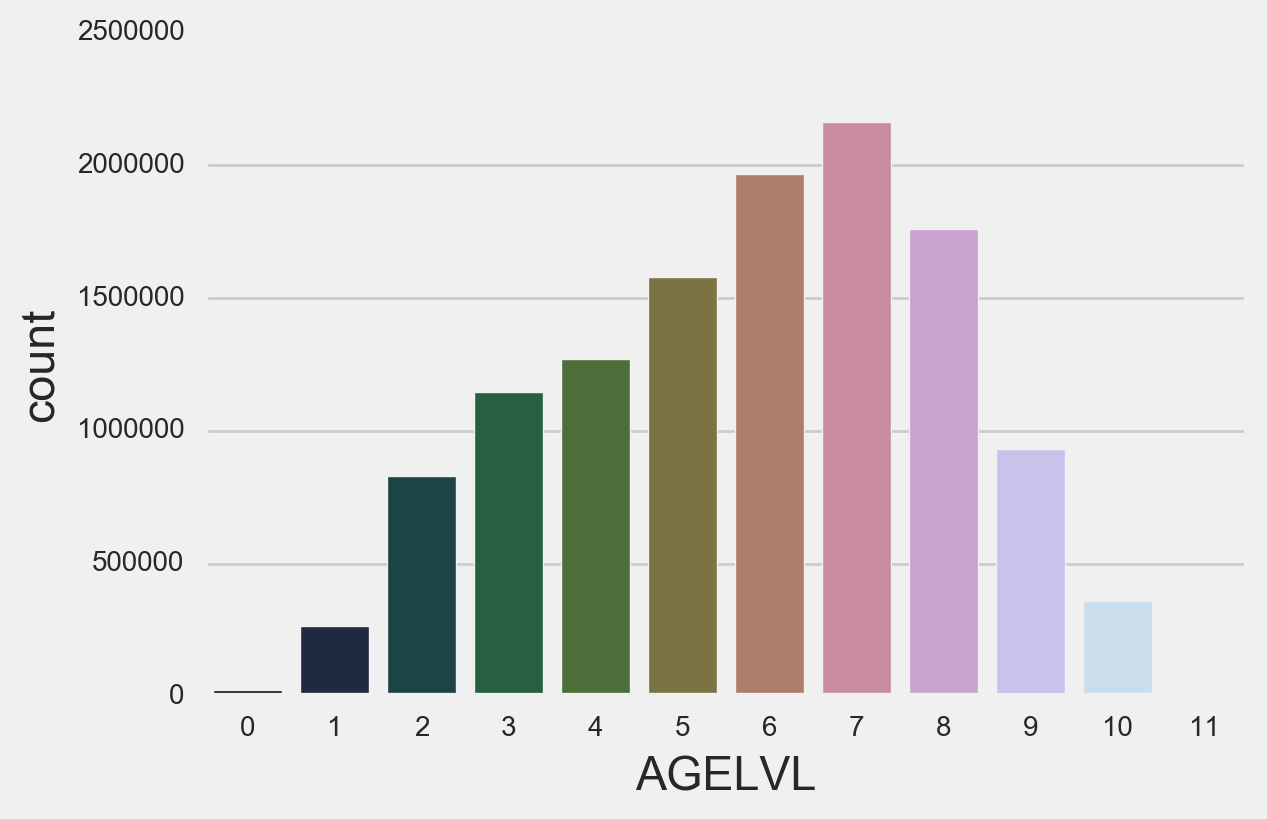

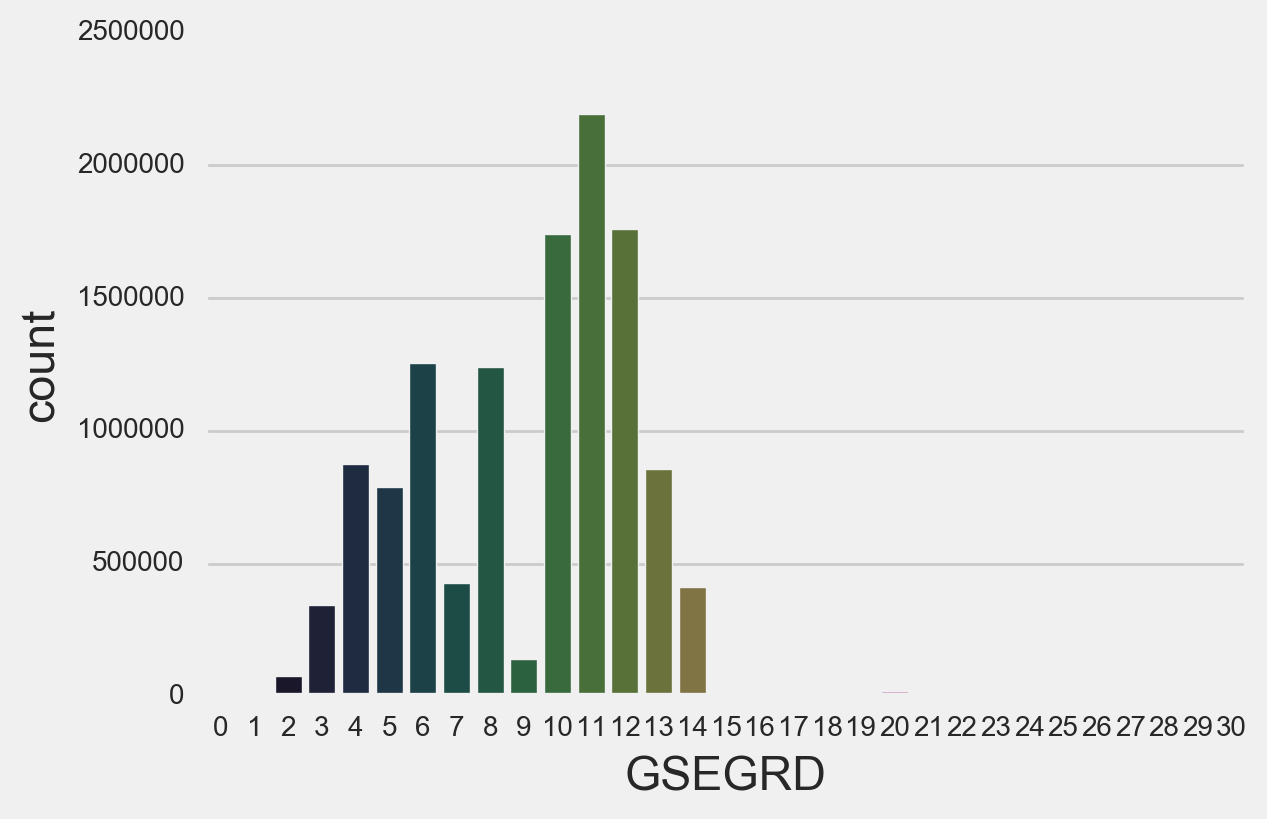

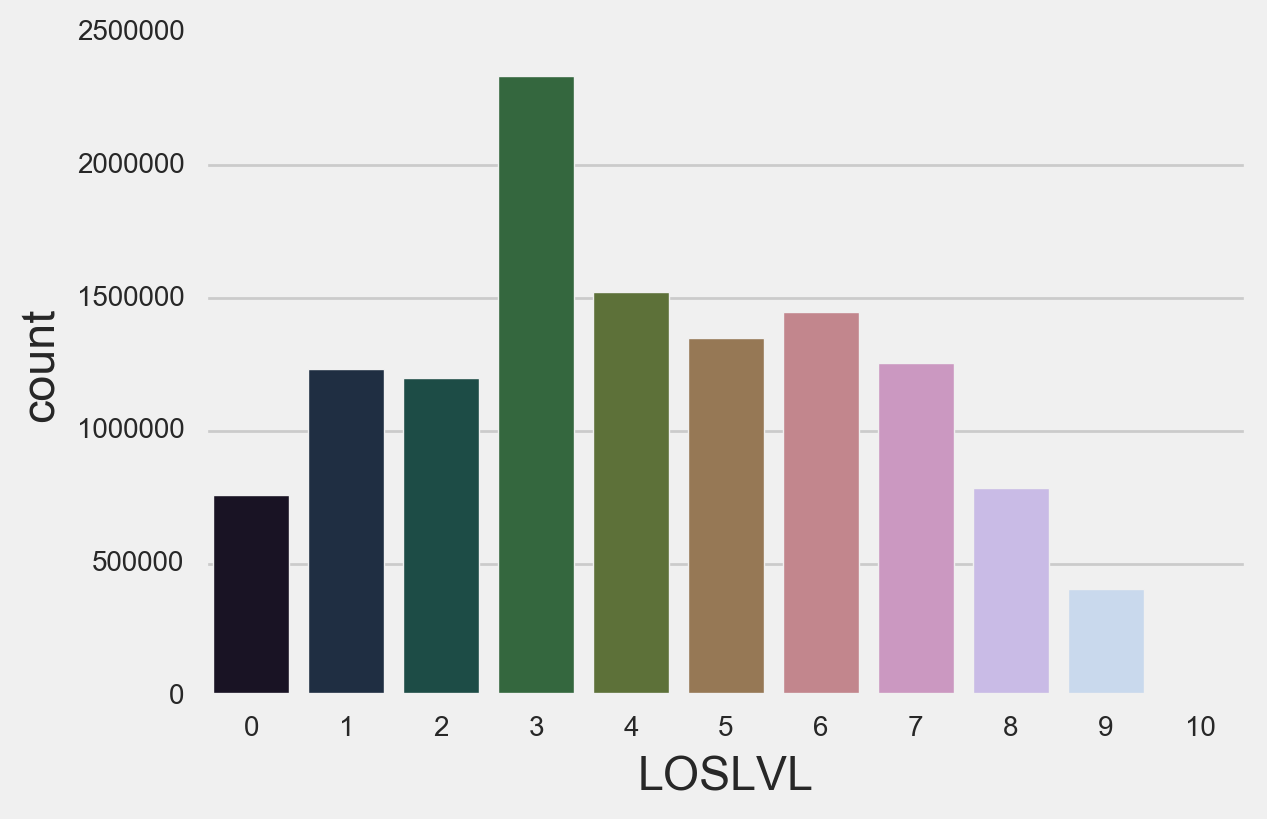

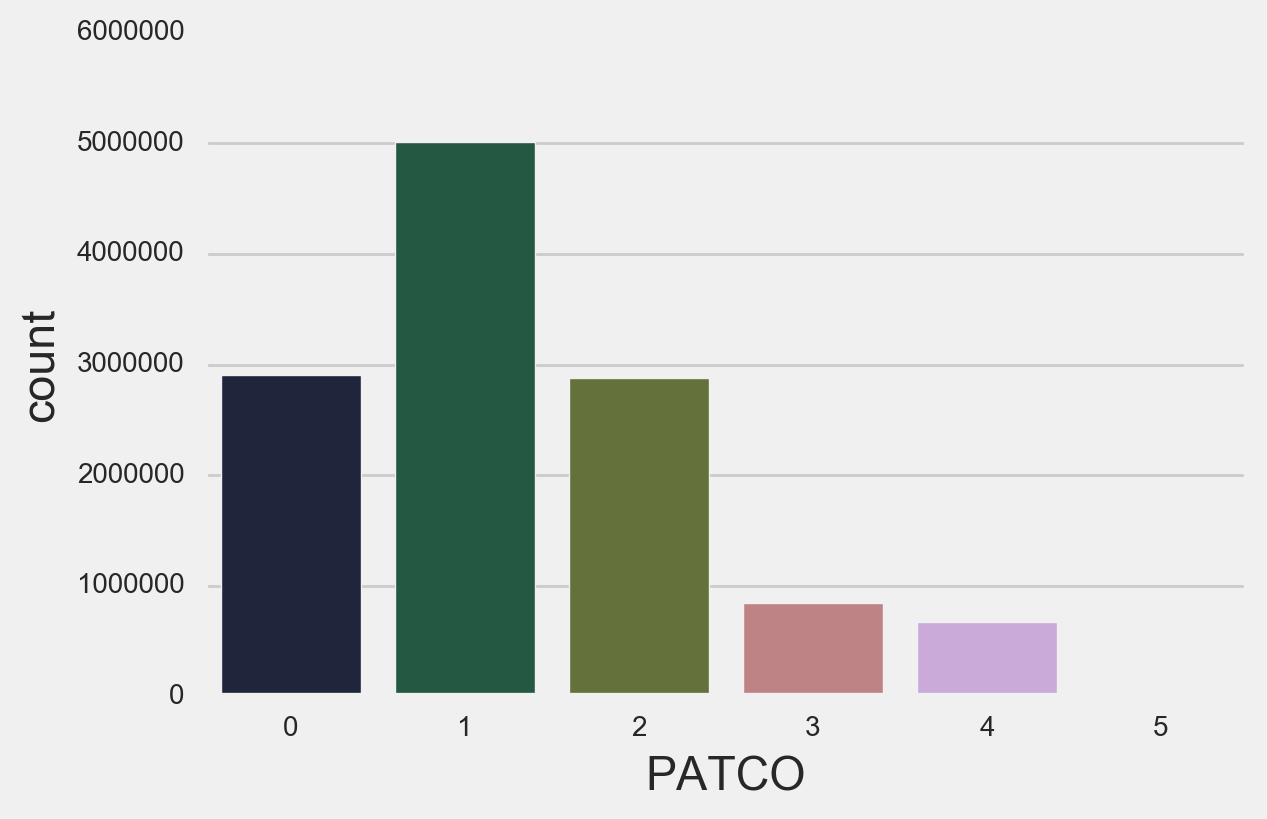

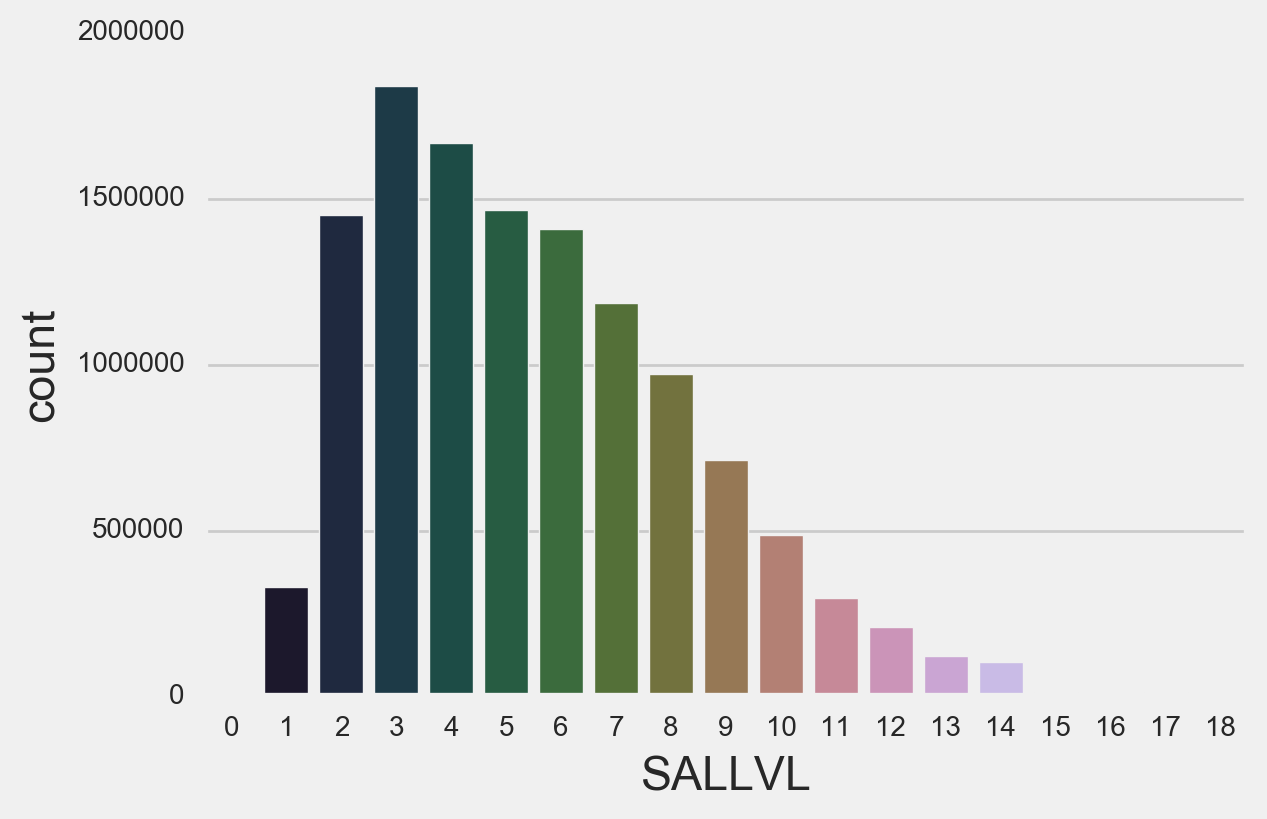

In [130]:
for x in key_var: 
    plt.figure(x)
    sns.countplot(x=x, data=master_df, palette = "cubehelix")

## Agency and Key Variable Cross Tabulations

In [125]:
def tables(column_name):
    crosstable = pd.crosstab(index=master_df["AGYSUB"], columns=master_df[column_name])
    return crosstable

In [126]:
tables(master_df)

ValueError: Must pass DataFrame with boolean values only